In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib
from dgm_library_ergodic import env_initializing, sample_room, init_DGM, train, warmstart_sol,compute_loss

from DGM import * # NOQA
import numpy as np
import keras
import pandas as pd
from tensorflow.python.ops.numpy_ops import np_config

env_initializing()

DTYPE = 'float32'

verbose = 1

In [2]:
Phi_theta = init_DGM(RNN_layers = 0, FNN_layers=2, nodes_per_layer=200,activation="relu")
Gamma_theta = init_DGM(RNN_layers = 0, FNN_layers=2, nodes_per_layer=200,activation="relu")

phi = np.genfromtxt('phi.txt')
gamma = np.genfromtxt('gamma.txt')

Phi_theta,Gamma_theta, X0  = warmstart_sol(Phi_theta,Gamma_theta,phi,gamma,2)

------ preprocessing for Gamma_theta ------
Gamma_theta It 00000: loss = 2.51992889e+02
Gamma_theta It 00100: loss = 1.81806717e+01
Gamma_theta It 00200: loss = 1.17081137e+01
Gamma_theta It 00300: loss = 7.82125998e+00
Gamma_theta It 00400: loss = 5.69828653e+00
Gamma_theta It 00500: loss = 4.47218561e+00
Gamma_theta It 00600: loss = 3.77043509e+00
Gamma_theta It 00700: loss = 3.30763388e+00
Gamma_theta It 00800: loss = 2.98339176e+00
Gamma_theta It 00900: loss = 2.74638486e+00
Gamma_theta It 01000: loss = 2.56460619e+00
Gamma_theta It 01100: loss = 2.42165160e+00
Gamma_theta It 01200: loss = 2.30177665e+00
Gamma_theta It 01300: loss = 2.20448732e+00
Gamma_theta It 01400: loss = 2.12394238e+00
Gamma_theta It 01500: loss = 2.05685949e+00
Gamma_theta It 01600: loss = 1.99622619e+00
Gamma_theta It 01700: loss = 1.94175780e+00
Gamma_theta It 01800: loss = 1.89547634e+00
Gamma_theta It 01900: loss = 1.85092628e+00
Gamma_theta It 02000: loss = 1.80609417e+00
Gamma_theta It 02100: loss = 1.7

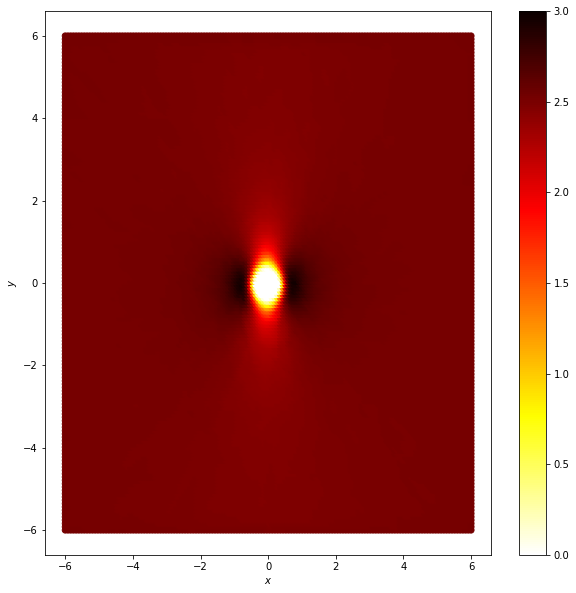

In [3]:
x = X0.iloc[:,0]
y = X0.iloc[:,1]
m = Gamma_theta(X0)*Phi_theta(X0)

fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=m, cmap='hot_r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.clim([0,3])
plt.colorbar()
plt.show()

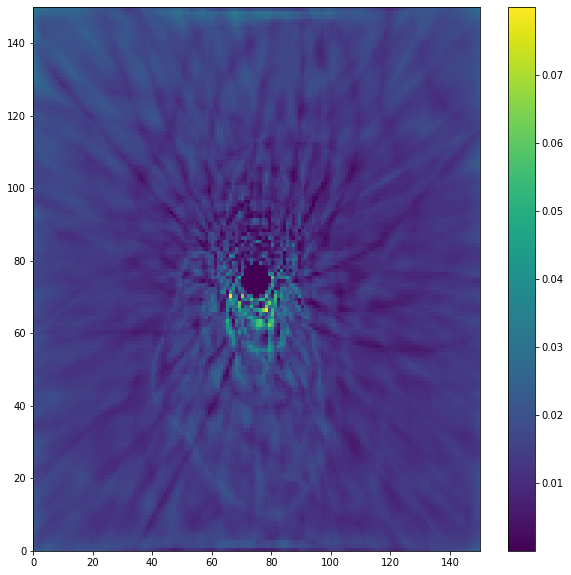

In [4]:
m_theta = m.numpy().reshape(150,150)
m_sol = phi*gamma
fig = plt.figure(figsize=(10,10))
plt.pcolor(abs(m_sol-m_theta))
plt.colorbar()
plt.show()

In [5]:
X_b, X_s, X_c = sample_room(0)

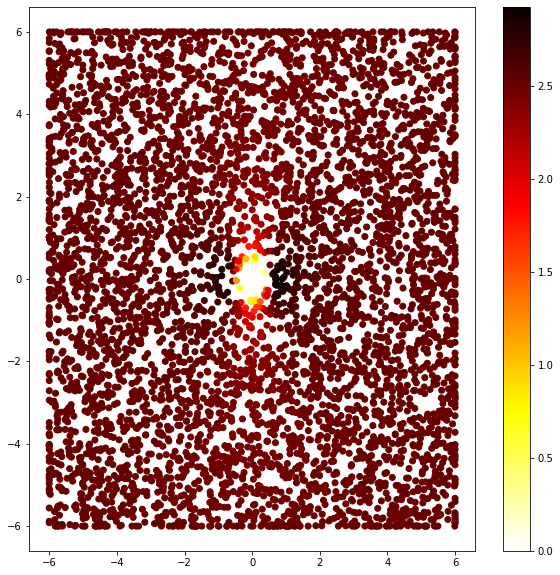

In [6]:
X0 = pd.concat([X_b,X_s,X_c])
x = X0.iloc[:,0]
y = X0.iloc[:,1]
m = Gamma_theta(X0)*Phi_theta(X0)
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=m, cmap='hot_r')
plt.colorbar()
plt.show()

In [7]:
Nx = 150
Ny = 150   
Lx = 6
Ly = 6
#Define grid 
x = np.linspace(-Lx,Lx,Nx)
y = np.linspace(-Ly,Ly,Ny)
X,Y = np.meshgrid(x,y)
x = X.reshape((Nx*Ny,1))
y = Y.reshape((Nx*Ny,1))
X0 = pd.DataFrame(np.concatenate([x,y],1))    
X0 = X0.astype(dtype = DTYPE)

compute_loss(Phi_theta,Gamma_theta,X0.to_numpy())

Type of phi tf.Tensor(
[[1.5826082]
 [1.5827365]
 [1.5829375]
 ...
 [1.5834489]
 [1.5835786]
 [1.5836909]], shape=(22500, 1), dtype=float32)


(<tf.Tensor: shape=(), dtype=float32, numpy=5841.81>,
 <tf.Tensor: shape=(), dtype=float32, numpy=16054.478>)